<a href="https://colab.research.google.com/github/mehrnazeraeisi/Spectral-Clustering/blob/main/Example_of_SpecralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

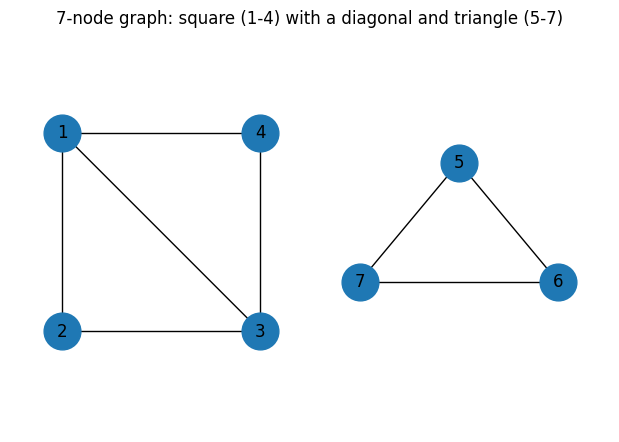

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# Square with a diagonal: nodes 1-4 (square) and diagonal (1,3)
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from(square_edges)

# Triangle: nodes 5-7
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from(triangle_edges)

# Positions: place square on the left, triangle on the right
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}

# Draw
plt.figure(figsize=(6,4))
nx.draw(G, pos=pos, with_labels=True, node_size=700, font_size=12)
plt.title("7-node graph: square (1-4) with a diagonal and triangle (5-7)")
plt.axis('equal')
plt.axis('off')
plt.show()


In [3]:
import networkx as nx
import numpy as np

# تعریف گراف بدون وزن (مثل برنامه اول)
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from(square_edges)

# مثلث
triangle_edges = [(5,6), (6,7)]
G.add_edges_from([(5,6), (6,7), (7,5)])

# ماتریس لاپلاسین (بدون وزن)
L = nx.laplacian_matrix(G).todense()
print("Laplacian Matrix L:")
print(L)

# مقادیر و بردارهای ویژه
eigvals, eigvecs = np.linalg.eigh(L)

print("\nEigenvalues:")
print(np.round(eigvals, 4))

print("\nEigenvectors (columns):")
print(np.round(eigvecs, 4))


Laplacian Matrix L:
[[ 3 -1 -1 -1  0  0  0]
 [-1  2 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0]
 [-1  0 -1  2  0  0  0]
 [ 0  0  0  0  2 -1 -1]
 [ 0  0  0  0 -1  2 -1]
 [ 0  0  0  0 -1 -1  2]]

Eigenvalues:
[0. 0. 2. 3. 3. 4. 4.]

Eigenvectors (columns):
[[-0.      0.5     0.      0.      0.      0.     -0.866 ]
 [-0.      0.5    -0.7071  0.      0.      0.4082  0.2887]
 [-0.      0.5     0.      0.      0.     -0.8165  0.2887]
 [-0.      0.5     0.7071  0.      0.      0.4082  0.2887]
 [ 0.5774  0.      0.      0.6395  0.5077  0.     -0.    ]
 [ 0.5774  0.      0.      0.1199 -0.8076  0.     -0.    ]
 [ 0.5774  0.      0.     -0.7594  0.3     0.     -0.    ]]


Cluster labels for nodes:
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 1
Node 6: Cluster 1
Node 7: Cluster 1


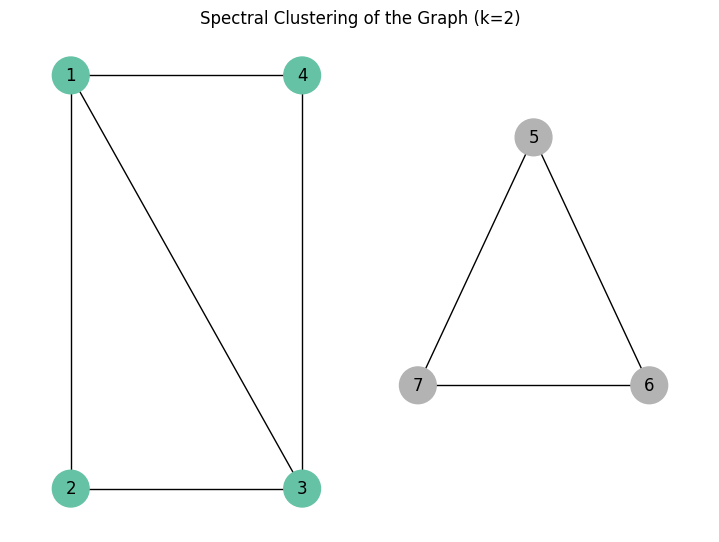

In [4]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- ساخت گراف ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from(square_edges)

# مثلث
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from(triangle_edges)

# --- محاسبه ماتریس لاپلاسین ---
L = nx.laplacian_matrix(G).todense()

# --- محاسبه مقادیر و بردارهای ویژه ---
eigvals, eigvecs = np.linalg.eigh(L)

# تعداد خوشه‌ها = 2 (چون گراف دو بخش جدا دارد: مربع+قطر و مثلث)
k = 2
X = eigvecs[:, :k]   # انتخاب k بردار ویژه متناظر با کوچکترین مقادیر ویژه

# --- اجرای KMeans روی فضای ویژگی ---
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
labels = kmeans.fit_predict(X)

# --- نمایش نتایج ---
print("Cluster labels for nodes:")
for node, cluster in zip(G.nodes(), labels):
    print(f"Node {node}: Cluster {cluster}")

# --- رسم گراف با رنگ خوشه‌ها ---
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=labels, cmap=plt.cm.Set2, font_size=12)
plt.title("Spectral Clustering of the Graph (k=2)")
plt.axis('off')
plt.show()


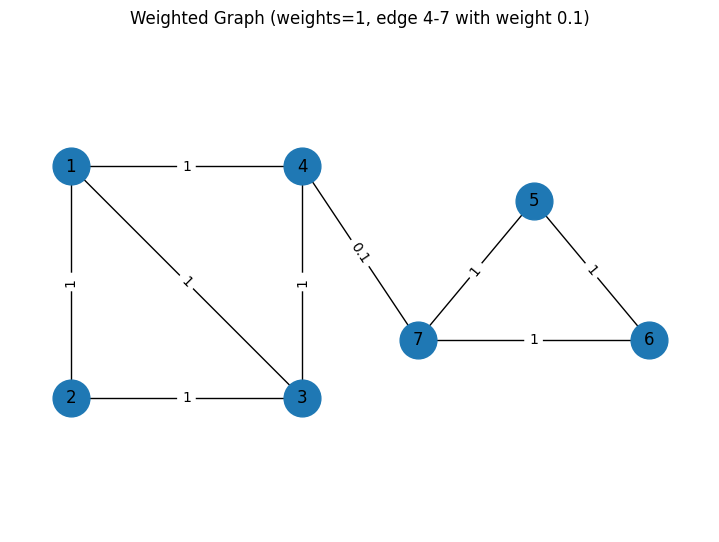

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create weighted graph
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# Square with diagonal (weight = 1)
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in square_edges)

# Triangle (weight = 1)
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in triangle_edges)

# Extra edge (weight = 0.1)
G.add_edge(4, 7, weight=0.1)

# Positions
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}

# Draw graph
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12)

# Draw edge labels (weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

plt.title("Weighted Graph (weights=1, edge 4-7 with weight 0.1)")
plt.axis('equal')
plt.axis('off')
plt.show()


Laplacian matrix L (weighted):
[[ 3.  -1.  -1.  -1.   0.   0.   0. ]
 [-1.   2.  -1.   0.   0.   0.   0. ]
 [-1.  -1.   3.  -1.   0.   0.   0. ]
 [-1.   0.  -1.   2.1  0.   0.  -0.1]
 [ 0.   0.   0.   0.   2.  -1.  -1. ]
 [ 0.   0.   0.   0.  -1.   2.  -1. ]
 [ 0.   0.   0.  -0.1 -1.  -1.   2.1]]

Eigenvalues:
[0.       0.055309 2.047425 3.       3.069365 4.       4.027902]

Eigenvectors (columns):
[[-0.377964 -0.331721  0.016741 -0.        0.029657  0.707107 -0.495928]
 [-0.377964 -0.341155 -0.706014  0.       -0.055466  0.        0.489105]
 [-0.377964 -0.331721  0.016741 -0.        0.029657 -0.707107 -0.495928]
 [-0.377964 -0.303939  0.70522  -0.        0.023752  0.        0.516589]
 [-0.377964  0.444371 -0.034316  0.707107  0.397893 -0.        0.013462]
 [-0.377964  0.444371 -0.034316 -0.707107  0.397893  0.        0.013462]
 [-0.377964  0.419793  0.035944  0.       -0.823385 -0.       -0.04076 ]]

Cluster labels for nodes:
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 

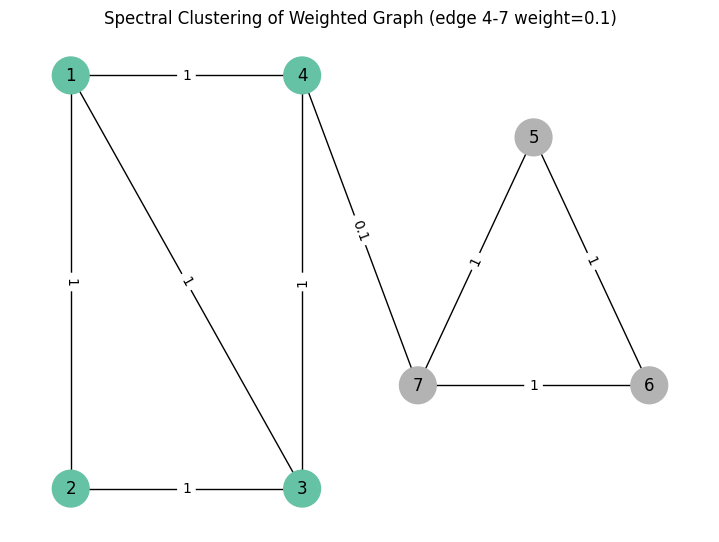

In [1]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- ساخت گراف وزن‌دار ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر (وزن 1)
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in square_edges)

# مثلث (وزن 1)
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in triangle_edges)

# یال اضافی بین 4 و 7 با وزن 0.1
G.add_edge(4, 7, weight=0.1)

# --- ماتریس لاپلاسین وزن‌دار ---
L = nx.laplacian_matrix(G, weight='weight').todense()
L = np.array(L, dtype=float)
print("Laplacian matrix L (weighted):")
print(np.round(L, 6))

# --- مقادیر و بردارهای ویژه ---
eigvals, eigvecs = np.linalg.eigh(L)
print("\nEigenvalues:")
print(np.round(eigvals, 6))

print("\nEigenvectors (columns):")
print(np.round(eigvecs, 6))

# --- خوشه‌بندی طیفی ---
k = 2  # انتظار داریم دو خوشه (مربع + مثلث، ولی چون یال ضعیف اضافه شده ارتباط کم ایجاد شده)
X = eigvecs[:, :k]
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
labels = kmeans.fit_predict(X)

print("\nCluster labels for nodes:")
for node, cluster in zip(G.nodes(), labels):
    print(f"Node {node}: Cluster {cluster}")

# --- نمایش گراف با رنگ‌بندی خوشه‌ها ---
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=labels, cmap=plt.cm.Set2, font_size=12)

# نمایش وزن‌ها روی یال‌ها
labels_edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_edges)

plt.title("Spectral Clustering of Weighted Graph (edge 4-7 weight=0.1)")
plt.axis('off')
plt.show()
